In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal, fft
import itertools
import japanize_matplotlib

In [41]:
# グラフの設定
fontsize_title = 20
fontsize_label = 20
max_xlin = 35

# サンプリング周波数
fs_acc = 390
fs_gyro = 390
fs_pressure = 20

In [42]:
# CSVファイルを読み込む
walk_file_name = "./logs/walk_run/Pressure.csv"
elevator_file_name = "./logs/elevator/Pressure.csv"

df_walk = pd.read_csv(
    walk_file_name,
    header=0,
    names=("time", "pressure")
)

df_elevator = pd.read_csv(
    elevator_file_name,
    header=0,
    names=("time", "pressure")
)


<Figure size 640x480 with 0 Axes>

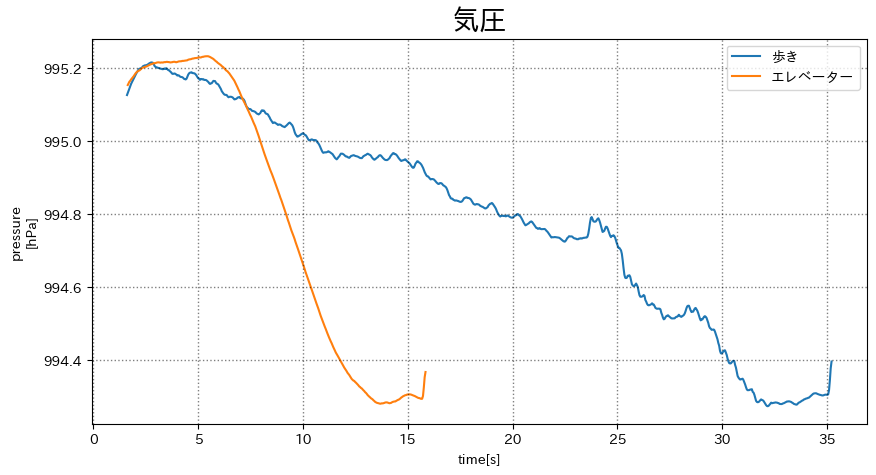

In [43]:
# 移動平均フィルターをかける
window = 40
df_walk['low'] = df_walk['pressure'].rolling(window=window).mean()
df_elevator['low'] = df_elevator['pressure'].rolling(window=window).mean()

# グラフを描画する
plt.subplots_adjust(hspace=0.3)
fig = plt.figure(figsize=(10, 5))

## 気圧
plt.plot(df_walk['time'], df_walk['low'], zorder=1, label='歩き')
plt.plot(df_elevator['time'], df_elevator['low'], zorder=1, label='エレベーター')
plt.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
plt.title('気圧', fontdict={'size': fontsize_title})
plt.xlabel('time[s]')
plt.ylabel('pressure\n[hPa]')
plt.legend()

plt.show()


In [44]:
def plot_fft(df):
  df_with_out_nan = df.dropna()
  fft_result = np.fft.fft(df_with_out_nan)

  return fft_result


/Users/satooru/.pyenv/versions/3.10.8/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Figure size 640x480 with 0 Axes>

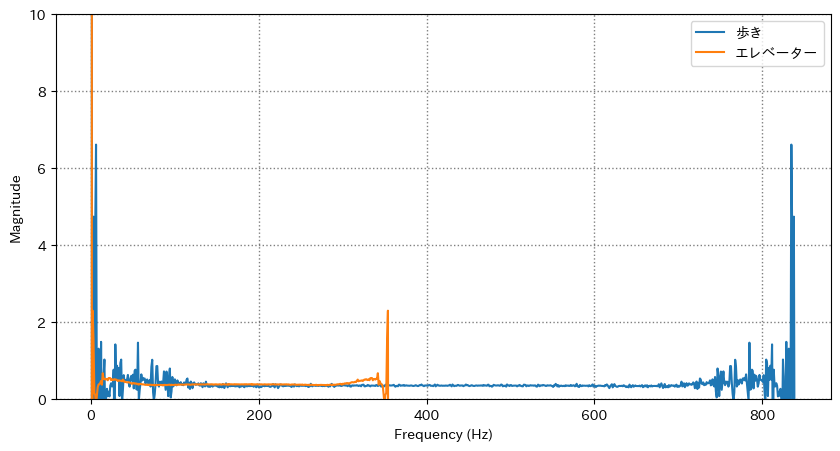

In [45]:
# グラフを描画する
plt.subplots_adjust(hspace=0.3)
fig = plt.figure(figsize=(10, 5))

fft_result_walk = plot_fft(df_walk['low'])
fft_result_elevator = plot_fft(df_elevator['low'])

## 気圧
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.plot(fft_result_walk, label='歩き')
plt.plot(fft_result_elevator, label='エレベーター')
plt.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
# plt.xlim(-10, 10)
plt.ylim(0, 10)
plt.legend()

plt.show()
